In [5]:
"""
色々準備
"""
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.circuit import Gate

# import basic plot tools
from qiskit.visualization import plot_histogram

In [19]:
"""
ブルーバックス本のドイチュ・ジョサを実装する
"""
def dj_circuit(blackbox):
    q_in = 3  # 入力量子ビット
    cbits = 3
    dj_qc = QuantumCircuit(q_in+1, cbits)

    """ステップA
    アドレスビットにアダマールゲートを適用
    """
    for i in range(q_in):
        dj_qc.h(i)
    dj_qc.barrier()

    """ステップB
    量子ブラックボックス回路を作成
    量子ブラックボックス回路は、
    * アドレスビットに対応するビット値が、
    - 0ならば、レジスタビットはそのまま
    - 1ならば、レジスタビットの値を反転する
    これにより、ブラックボックスのビット列を、重ね合わせ状態のレジスタビットに一気に読み出す
    """
    dj_qc.append(blackbox, qargs=range(q_in+1))
    dj_qc.barrier()

    """ステップC
    制御位相シフトゲートで、レジスタビットが|1>の項の位相を反転（負にする） 
    """
    dj_qc.z(q_in)
    dj_qc.barrier()

    """ステップD
    再度、量子ブラックボックス回路を適用
    これにより、レジスタビットは初期状態に戻る
    """
    dj_qc.append(blackbox, qargs=range(q_in+1))
    dj_qc.barrier()

    """ステップE
    再度、アドレスビットにアダマールゲートを適用
    """
    for i in range(q_in):
        dj_qc.h(i)
    dj_qc.barrier()

    """測定
    アドレスビットを測定する。
    * すべて|0>なら、均一なビット列
    * それ以外なら、等分なビット列
    """
    for i in range(q_in):
        dj_qc.measure(i, i)
    
    return dj_qc

In [20]:
def make_blackbox_01101010():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(4, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.cx(0, 3)       # 1
    oracle.ccx(0, 1, 3)   # 3
    oracle.ccx(0, 2, 3)   # 5
    oracle.ccx(1, 2, 3)  # 6
    return oracle

In [27]:
def make_blackbox_00000000():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(4, name="blackbox")
    # ビット列のビットが立っているところはない
    return oracle

In [28]:
def make_blackbox_11111111():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(4, name="blackbox")
    # ビット列のビットが立っているところは全部なので、q3を反転するだけでOK
    oracle.x(3)
    return oracle

In [37]:
def make_blackbox_10110100():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(4, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.cx(1, 3)       # 2
    oracle.cx(2, 3)       # 4
    oracle.ccx(0, 2, 3)   # 5
    oracle.rcccx(0, 1, 2, 3)  # 7
    return oracle

In [39]:
def make_blackbox_00101101():
    """ブラックボックス回路を作成する
    """
    oracle = QuantumCircuit(4, name="blackbox")
    # ビット列のビットが立っているところ
    oracle.cx(0, 3)       # 0
    oracle.cx(1, 3)       # 2
    oracle.ccx(0, 1, 3)   # 3
    oracle.ccx(0, 2, 3)  # 5
    return oracle

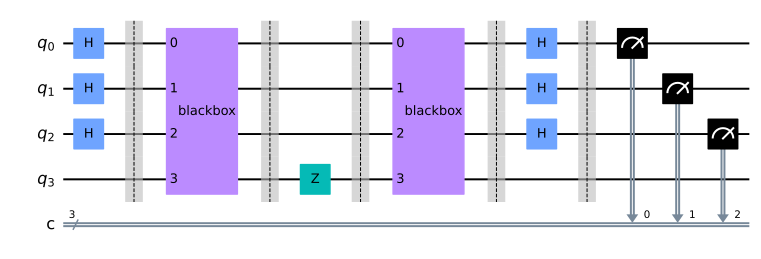

In [24]:
blackbox = make_blackbox_01101010()
dj_qc = dj_circuit(blackbox)
dj_qc.draw()

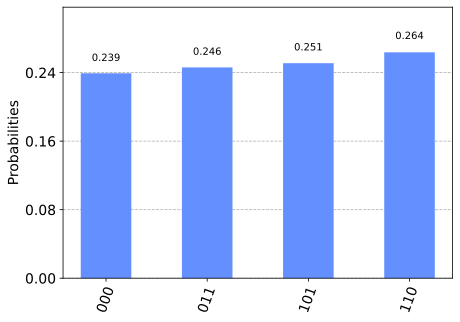

In [25]:
"""01101010実行
"""
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

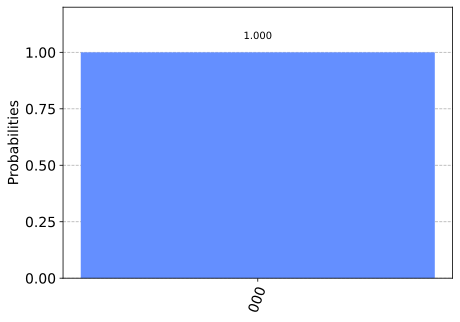

In [29]:
"""00000000実行
"""
blackbox = make_blackbox_00000000()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

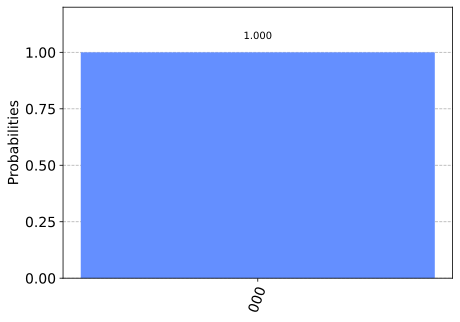

In [30]:
"""11111111実行
"""
blackbox = make_blackbox_11111111()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

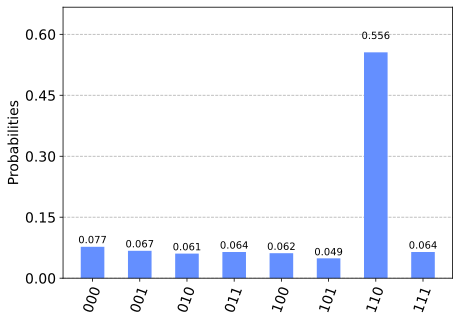

In [38]:
"""10110100実行
なんか違くない？ rcccxのせい？
"""
blackbox = make_blackbox_10110100()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)

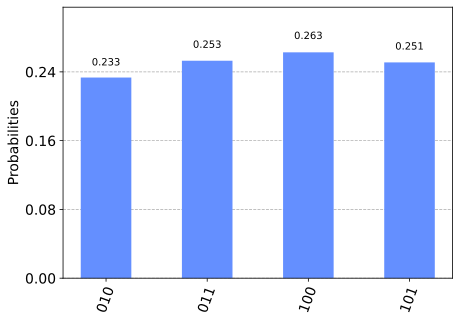

In [41]:
"""00101101実行
"""
blackbox = make_blackbox_00101101()
dj_qc = dj_circuit(blackbox)
backend = Aer.get_backend("qasm_simulator")
shots = 1024
results = execute(dj_qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)